# **Importing libraries & Reading Data**


## Importing libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

my_palette = sns.color_palette(["#C62828","#1565C0","#8A897C","#59D2FE","#D7B49E"])
sns.set_palette(my_palette)

## Read the data

In [85]:
df = pd.read_csv("Heart_Disease.csv")

# **Data Preprocessing**


In [86]:
#look at the first 5 rows of the data
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


In [87]:
#check the shape of the data set
df.shape

(270, 17)

In [88]:
#check the data type of each column
df.dtypes

id                           int64
Age                        float64
Gender                      object
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
work_type                   object
smoking_status              object
Heart Disease               object
dtype: object

In [89]:
#check the number of nulls in each column and the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [90]:
df.isnull().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

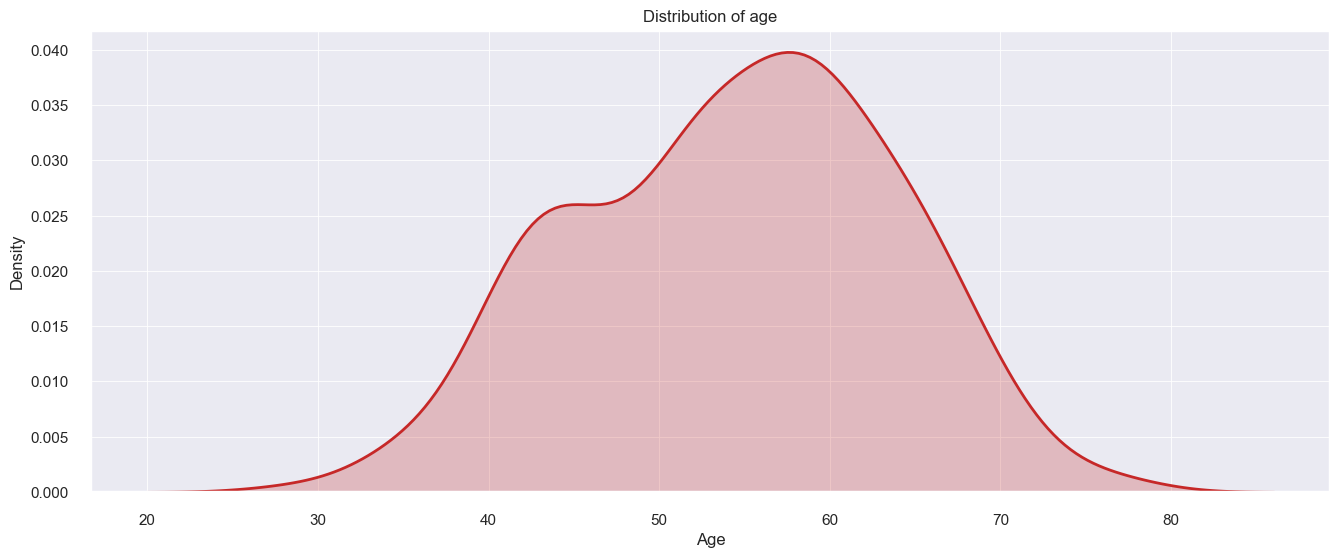

In [91]:
plt.figure(figsize = (16, 6))
plt.title("Distribution of age")
sns.kdeplot(data = df['Age'], fill = True)
plt.show()

The plot showed that the age is normally distributed so we will use the mean to replace null values in age column

In [92]:
#replacing nulls in age column by mean
mean_value=df['Age'].mean()
df['Age'].fillna(value=mean_value, inplace=True)

In [93]:
#replacing nulls in Gender, work_type, smoking_status columns by their mode because they are categorical data
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)
df['work_type'].fillna(value=df['work_type'].mode()[0], inplace=True)
df['smoking_status'].fillna(value=df['smoking_status'].mode()[0], inplace=True)


C:\Users\Jonat\AppData\Local\Temp\ipykernel_17584\3098129781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(),lw = 1, annot = True, cmap = 'cividis')


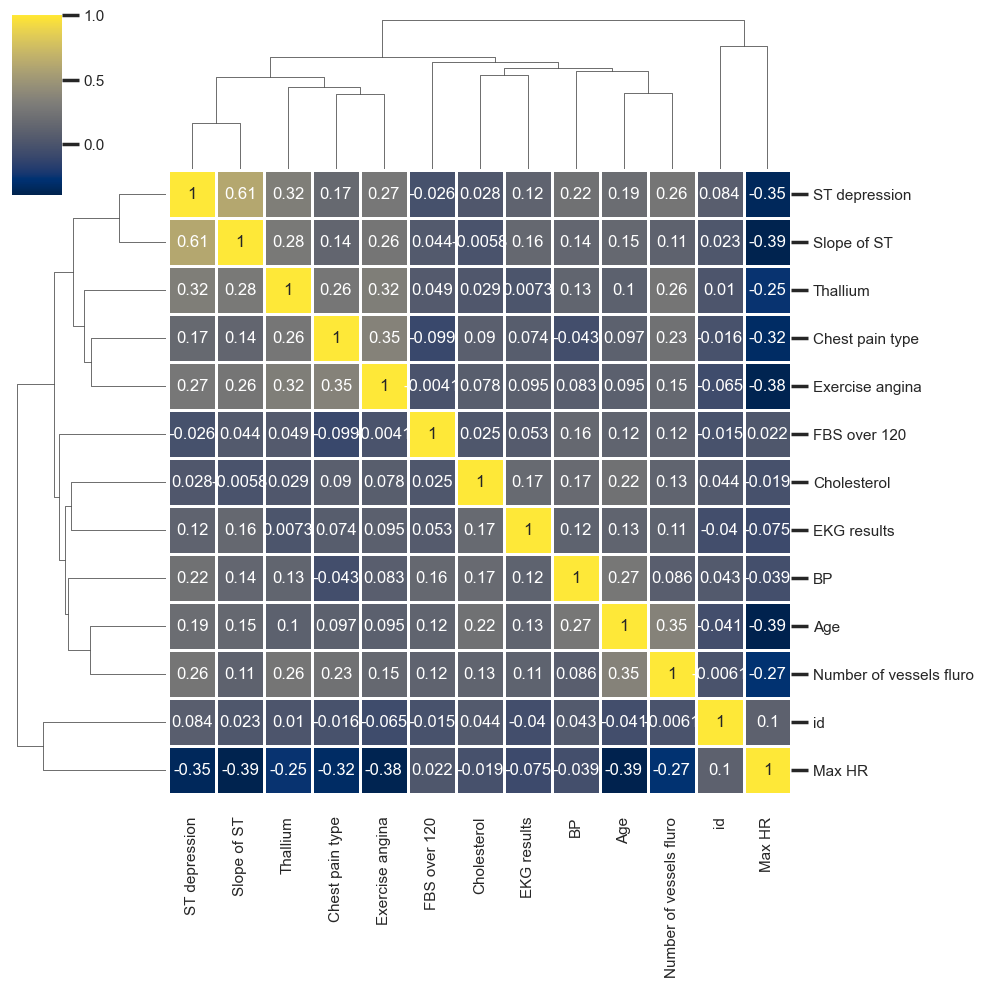

In [94]:
sns.clustermap(df.corr(),lw = 1, annot = True, cmap = 'cividis')
plt.show()

In [95]:
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      270 non-null    float64
 2   Gender                   270 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [96]:
# for col in df.columns:
#     # calculate interquartile range
#     q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
#     iqr = q75 - q25
#     # calculate the outlier cutoff
#     cut_off = iqr * 1.5
#     lower, upper = q25 - cut_off, q75 + cut_off
#     # identify outliers
#     outliers = ( ( df[col] < lower) | (df[col] > upper) )
#     index_label = df[outliers].index
#     print(f'Number of outliers in {col}: {len(index_label)}')

In [97]:
continuous_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression','Thallium']
continuous_df = df[continuous_columns]

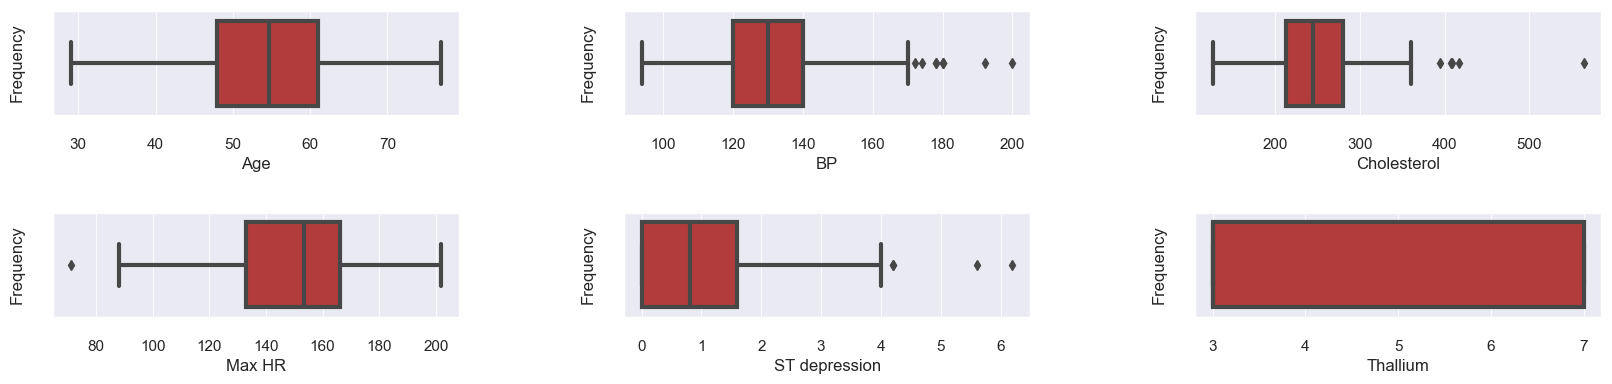

In [98]:
nrows = 2
ncols = 3

# choosing continuous data
continuous_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression','Thallium']
continuous_df = df[continuous_columns]

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4))
axes = axes.flatten()

for i, col in enumerate(continuous_df):
    sns.boxplot(data=continuous_df, x=col, ax=axes[i])
    axes[i].set_ylabel('Frequency')
for i in range(len(continuous_df.columns), nrows * ncols):
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.9)
plt.show()


In [99]:
# Checking outliers 
#fig, axs = plt.subplots(4,2, figsize = (25,30))
#plt = sns.boxplot(df['Age'], ax = axs[0, 0])

#plt.tight_layout()


In [100]:
# #function to replace outliers with the max value possible without missing the data :)
# def outliers(dataset,col):
#   Q1 = dataset[col].quantile(0.25)
#   Q3 = dataset[col].quantile(0.75)
#   IQR = Q3-Q1
#   lower_bound = Q1-1.5*IQR
#   upper_bound = Q3+1.5*IQR

#   for i in range(len(dataset)):
#       if dataset[col].iloc[i] > upper_bound:
#           dataset[col].iloc[i] = upper_bound
#       if dataset[col].iloc[i] < lower_bound:
#           dataset[col].iloc[i] = lower_bound
# for col in df.columns:
#     outliers(df, col)

# for col in df.columns:
#     # calculate interquartile range
#     q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
#     iqr = q75 - q25
#     # calculate the outlier cutoff
#     cut_off = iqr * 1.5
#     lower, upper = q25 - cut_off, q75 + cut_off
#     # identify outliers
#     outliers = ( ( df[col] < lower) | (df[col] > upper) )
#     index_label = df[outliers].index
#     print(f'Number of outliers in {col}: {len(index_label)}')
#     # df.drop(index_label, inplace=True)

In [101]:
#Normlize the data
# Create a StandardScaler object
# scaler = StandardScaler()

# Fit and transform the data
# normalized_data = scaler.fit_transform(df)

# Create a new dataframe from the normalized data
# df = pd.DataFrame(normalized_data, columns=df.columns)



In [102]:
continuous_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression','Thallium']
continuous_df = df[continuous_columns]

from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=10)
var_thres.fit(continuous_df)
print(var_thres.get_support())

constant_columns = [column for column in continuous_df.columns
                    if column not in continuous_df.columns[var_thres.get_support()]]
# df.drop(columns=['ST depression','Thallium','id'],inplace=True)                    

[ True  True  True  True False False]


# **Data Analysis**

## Numeric Analyis

We need to divide the dataset into numeric and categorical datasets


In [152]:
# Create a new column with age ranges
df['Age Range'] = np.where(df['Age'] >= 55, '>55', '<55')

In [153]:
df.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease,Age Range
0,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,1,>55
1,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,0,>55
2,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,1,>55
3,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,0,>55
4,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,0,>55


In [154]:
df['Heart Disease']=df['Heart Disease'].replace({'Yes': 1, 'No': 0})
df.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease,Age Range
0,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,1,>55
1,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,0,>55
2,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,1,>55
3,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,0,>55
4,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,0,>55


In [106]:
columns = df.columns

In [155]:
numeric_columns = ['Age','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium','Heart Disease']
categorical_columns = ['Gender','work_type','smoking_status','Age Range']

# Dividing into numeric dataset and categorical dataset
numeric_df = df[numeric_columns]
categorical_df =df[categorical_columns]

In [108]:
numeric_df.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.424242,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.080492,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,54.712121,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [109]:
categorical_df.describe()

,Gender,work_type,smoking_status
count,270,270,270
unique,2,5,4
top,Female,Private,never smoked
freq,185,168,102


In [156]:
Negative_df = df.loc[df["Heart Disease"]==0,:]
Positive_df = df.loc[df["Heart Disease"]==1,:]

In [120]:
Negative_df.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0
mean,52.771313,2.820000,128.866667,244.213333,0.153333,0.860000,158.333333,0.153333,0.622667,1.400000,0.286667,3.786667,0.0
std,9.499654,0.927362,16.457660,54.019085,0.361516,0.990085,19.283357,0.361516,0.800851,0.590757,0.648557,1.556914,0.0
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0
25%,45.000000,2.000000,120.000000,209.000000,0.000000,0.000000,148.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0
50%,52.500000,3.000000,130.000000,236.000000,0.000000,0.000000,161.000000,0.000000,0.200000,1.000000,0.000000,3.000000,0.0
75%,59.000000,3.750000,140.000000,268.750000,0.000000,2.000000,172.000000,0.000000,1.175000,2.000000,0.000000,3.000000,0.0
max,76.000000,4.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,0.0


In [121]:
Positive_df.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.0
mean,56.490404,3.616667,134.441667,256.466667,0.141667,1.22500,138.858333,0.55000,1.584167,1.816667,1.150000,5.833333,1.0
std,8.102342,0.779823,19.095424,47.969166,0.350170,0.97414,23.130719,0.49958,1.282067,0.564843,1.034286,1.769648,0.0
min,35.000000,1.000000,100.000000,149.000000,0.000000,0.00000,71.000000,0.00000,0.000000,1.000000,0.000000,3.000000,1.0
25%,52.000000,4.000000,120.000000,227.250000,0.000000,0.00000,124.750000,0.00000,0.600000,1.000000,0.000000,3.000000,1.0
50%,58.000000,4.000000,130.000000,255.500000,0.000000,2.00000,141.500000,1.00000,1.400000,2.000000,1.000000,7.000000,1.0
75%,62.000000,4.000000,145.000000,286.500000,0.000000,2.00000,157.250000,1.00000,2.425000,2.000000,2.000000,7.000000,1.0
max,77.000000,4.000000,200.000000,409.000000,1.000000,2.00000,195.000000,1.00000,6.200000,3.000000,3.000000,7.000000,1.0


In [163]:
df.groupby('Gender').mean()

C:\Users\Jonat\AppData\Local\Temp\ipykernel_17584\3774296011.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()


,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Gender,,,,,,,,,,,,,
Female,53.958231,3.200000,130.502703,242.643243,0.156757,1.059459,148.340541,0.383784,1.122703,1.605405,0.724324,5.194595,0.540541
Male,55.438503,3.117647,133.176471,264.929412,0.129412,0.941176,152.588235,0.211765,0.891765,1.541176,0.552941,3.611765,0.235294


In [158]:
df.pivot_table(index='Age Range', aggfunc='mean',columns = 'Chest pain type')["Heart Disease"].style.bar(subset=[1],vmin=0,vmax=1,color="#D65F5F")\
    .bar(subset=[2],vmin=0,vmax=1,color="#D84535").bar(subset=[3],vmin=0,vmax=1,color="#BF2717").bar(subset=[4],vmin=0,vmax=1,color="#981508")

C:\Users\Jonat\AppData\Local\Temp\ipykernel_17584\3636013530.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='Age Range', aggfunc='mean',columns = 'Chest pain type')["Heart Disease"].style.bar(subset=[1],vmin=0,vmax=1,color="#D65F5F")\


Chest pain type,1,2,3,4
Age Range,,,,
<55,0.125000,0.074074,0.127660,0.622642
>55,0.333333,0.333333,0.343750,0.763158


In [164]:
df.pivot_table(index='Age Range', aggfunc='mean',columns = 'smoking_status')["Heart Disease"].style.bar(subset=["Unknown"],vmin=0,vmax=1,color="#D65F5F")\
    .bar(subset=["formerly smoked"],vmin=0,vmax=1,color="#D84535").bar(subset=["never smoked"],vmin=0,vmax=1,color="#BF2717").bar(subset=["smokes"],vmin=0,vmax=1,color="#981508")

C:\Users\Jonat\AppData\Local\Temp\ipykernel_17584\1508189944.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='Age Range', aggfunc='mean',columns = 'smoking_status')["Heart Disease"].style.bar(subset=["Unknown"],vmin=0,vmax=1,color="#D65F5F")\


smoking_status,Unknown,formerly smoked,never smoked,smokes
Age Range,,,,
<55,0.230769,0.363636,0.301887,0.347826
>55,0.640000,0.435897,0.612245,0.681818


In [168]:
df.pivot_table(index='Age Range', aggfunc='mean',columns = 'work_type')["Heart Disease"].style.bar(subset=["Unknown"],vmin=0,vmax=1,color="#D65F5F")\
    .bar(subset=["formerly smoked"],vmin=0,vmax=1,color="#D84535").bar(subset=["never smoked"],vmin=0,vmax=1,color="#BF2717").bar(subset=["smokes"],vmin=0,vmax=1,color="#981508")

C:\Users\Jonat\AppData\Local\Temp\ipykernel_17584\2002736217.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='Age Range', aggfunc='mean',columns = 'work_type')["Heart Disease"]


work_type,Govt_job,Never_worked,Private,Self-employed,children
Age Range,,,,,
<55,0.0625,0.0,0.321839,0.419355,NaN
>55,0.7500,NaN,0.567901,0.514286,0.666667


## Graphic Analyis

In [115]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
colors=["#80002D","#4C70F6","#8A897C","#59D2FE","#D7B49E"]
colors2=["#80002D","#0B3FEA"]

### Univariate Analysis

In [116]:
df.drop(columns="id",inplace=True)

In [117]:
my_palette = sns.color_palette(["#C62828","#1565C0","#8A897C","#59D2FE","#D7B49E"])

sns.set_palette(my_palette)

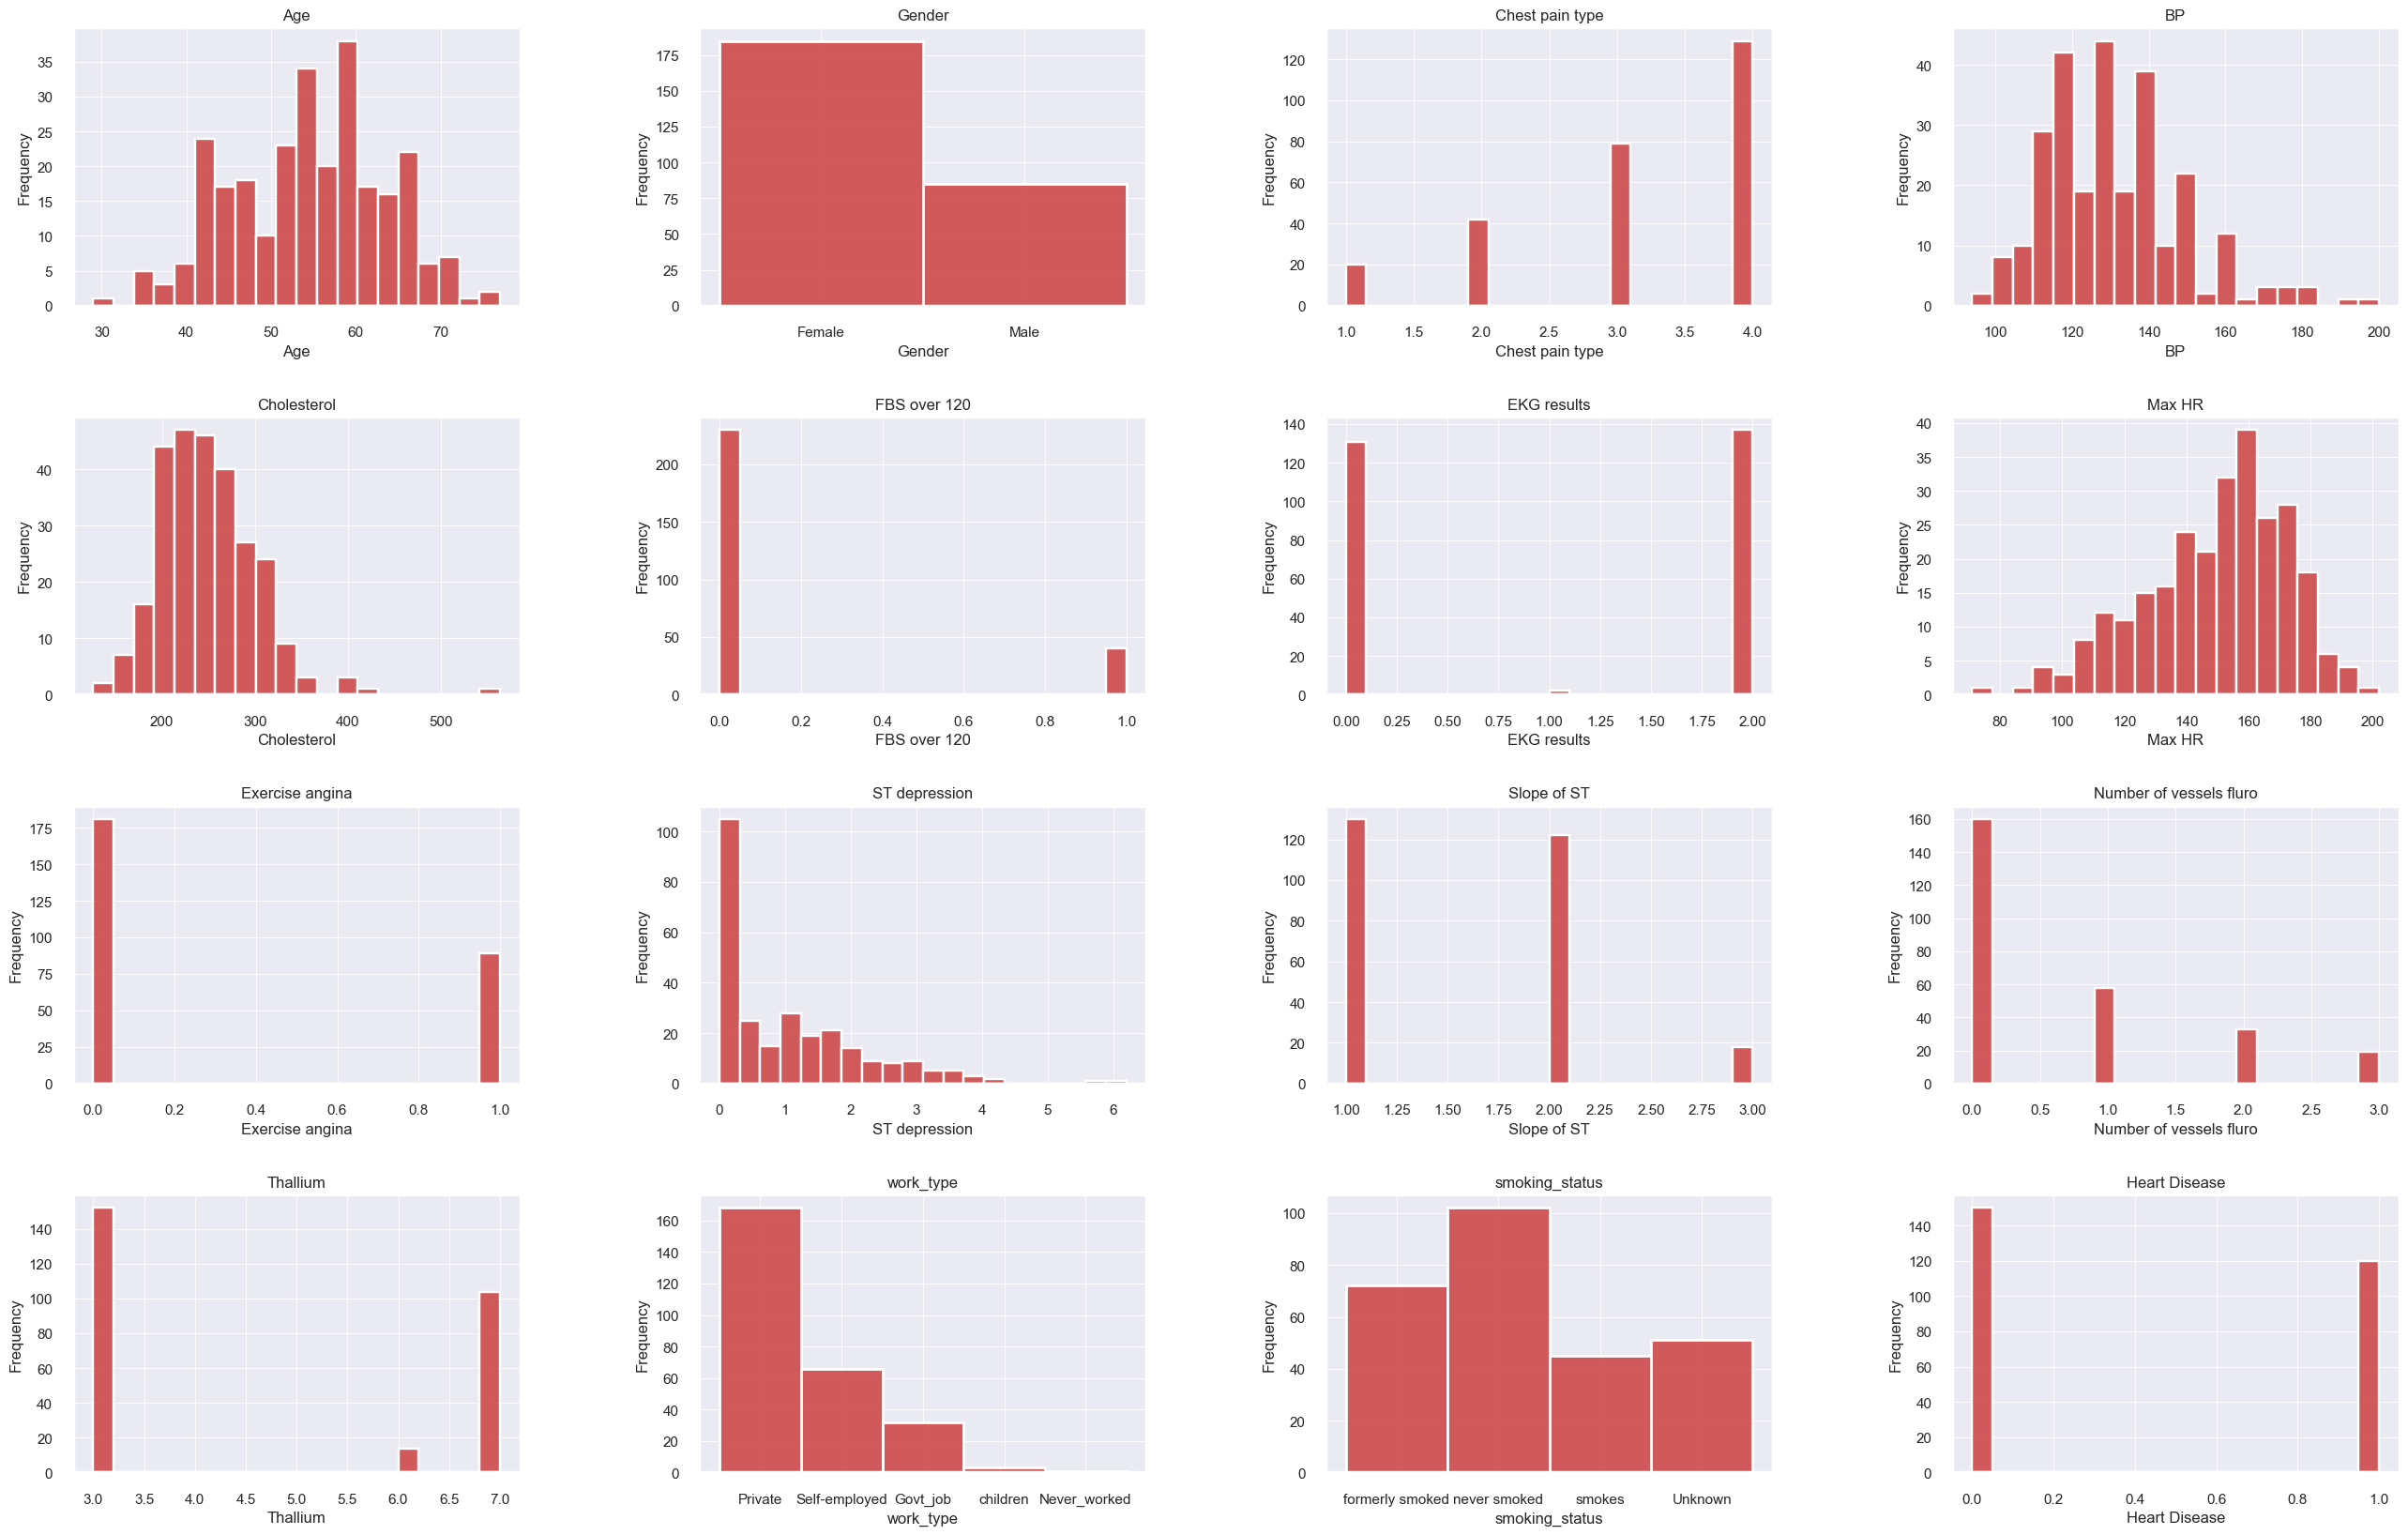

In [167]:
nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(32, 20))
axes = axes.flatten()
for i, col in enumerate(df.iloc[:, :-1].columns):
    sns.histplot(data=df, x=col, ax=axes[i], bins=20)
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequency')

for i in range(len(df.columns), nrows * ncols):
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


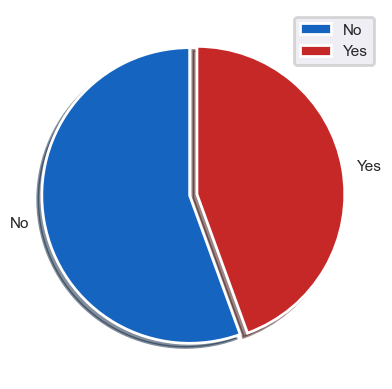

In [ ]:
mylabels = ["No", "Yes"]
myexplode = [0.05, 0]
colors = ["#1565C0","#C62828"]
plt.pie(df.value_counts("Heart Disease"), labels = mylabels, explode = myexplode, startangle = 90, shadow = True,colors=colors)
plt.legend()
plt.show()

# Divariate Analysis

## Age

Age is a major risk factor for heart disease due to the narrowing and decreased flexibility of arteries. Other risk factors such as high blood pressure, high cholesterol, and diabetes are also more common in older adults.

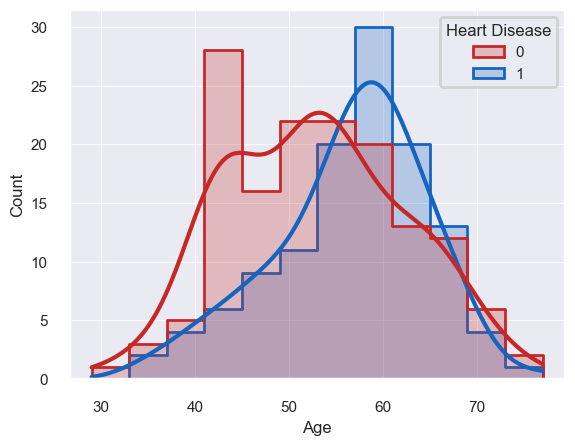

In [ ]:
sns.histplot(data = df, x="Age", hue=df["Heart Disease"],kde=True, element='step')
plt.show()

## Gender

Gender is a risk factor for heart disease. Women are more likely to develop heart disease than Men.

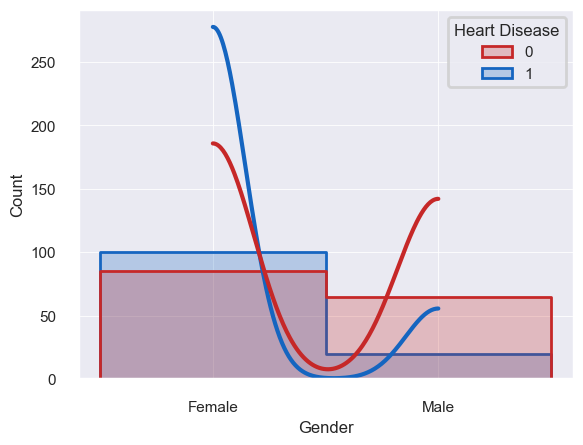

In [ ]:
sns.histplot(data = df, x="Gender", hue=df["Heart Disease"],kde=True, element='step')
plt.show()

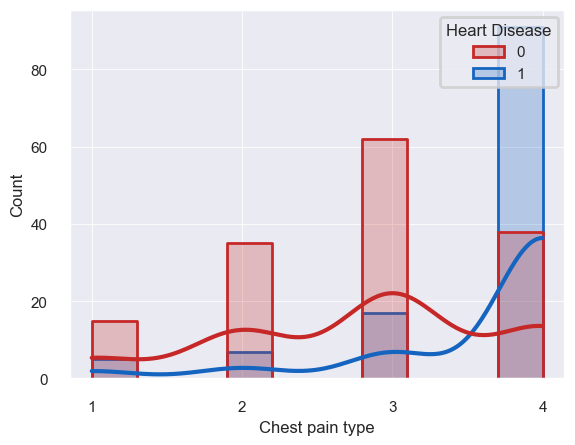

In [ ]:
sns.histplot(data = df, x="Chest pain type", hue=df["Heart Disease"],kde=True, element='step')
plt.xticks([1,2,3,4])
plt.show()

High blood pressure (hypertension) is a significant risk factor for heart disease. Over time, high blood pressure can damage the arteries and increase the workload on the heart, leading to an increased risk of heart disease, heart attack, and stroke. Lowering blood pressure through lifestyle changes and/or medication can help reduce the risk of heart disease.

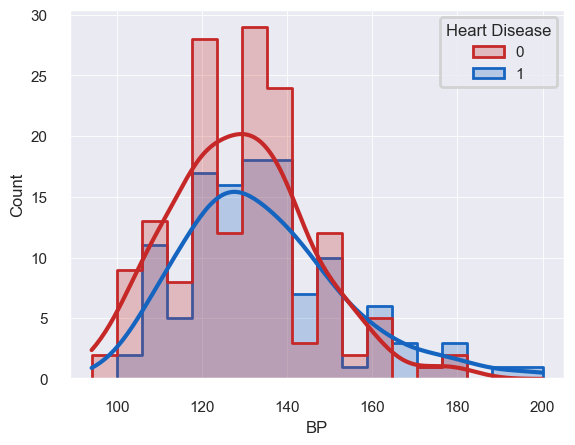

In [ ]:
sns.histplot(data = df, x="BP", hue="Heart Disease",kde=True, element='step')
plt.show()

Cholesterol can build up in the arteries, leading to atherosclerosis and increasing the risk of heart disease.

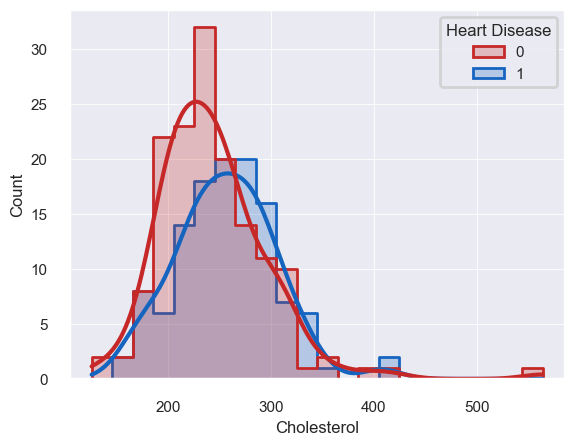

In [ ]:
sns.histplot(data = df, x="Cholesterol", hue="Heart Disease",kde=True, element='step')
plt.show()

Fasting blood sugar levels over 120 mg/dL are a risk factor for heart disease. High blood sugar levels can damage blood vessels and nerves, increasing the risk of heart disease.

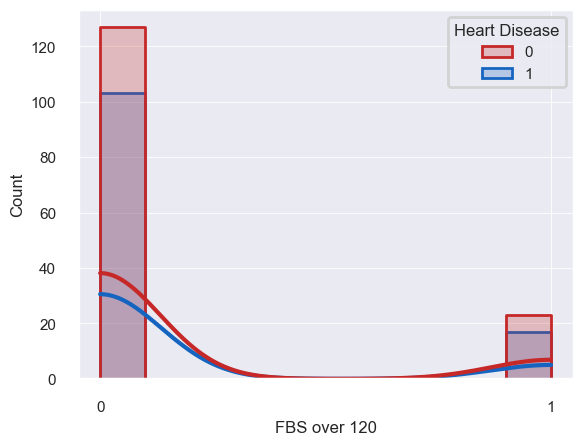

In [ ]:
sns.histplot(data = df, x="FBS over 120", hue="Heart Disease",kde=True, element='step')
plt.xticks([0,1])
plt.show()

EKG (Electrocardiogram) is a test that measures electrical activity of the heart. Abnormal results can indicate heart disease.

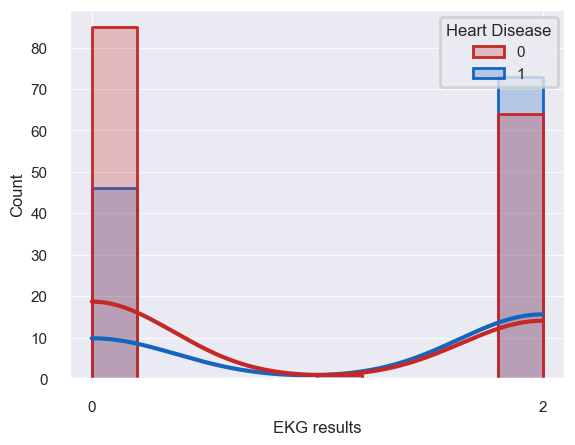

In [ ]:
sns.histplot(data = df, x="EKG results", hue="Heart Disease",kde=True, element='step')
plt.xticks([0,2])
plt.show()

Exercise-induced angina is chest pain or discomfort that occurs during physical activity in individuals with heart disease. It is caused by reduced blood flow to the heart muscle due to narrowed or blocked arteries.

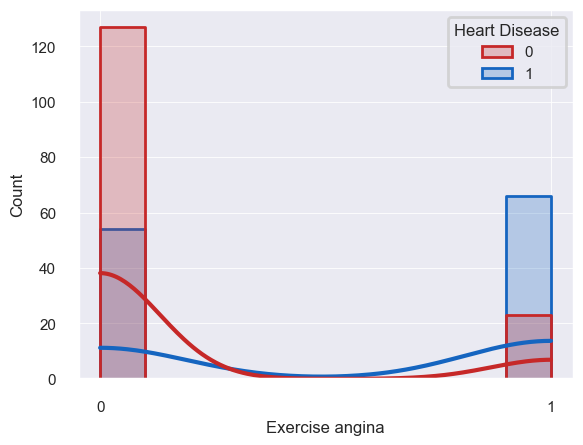

In [ ]:
sns.histplot(data = df, x="Exercise angina", hue="Heart Disease",kde=True, element='step')
plt.xticks([0,1])
plt.show()

ST depression is a type of abnormal ECG finding where the ST segment of the heart's electrical activity appears lowered. It is often associated with coronary artery disease and other heart conditions.

<AxesSubplot: xlabel='ST depression', ylabel='Count'>

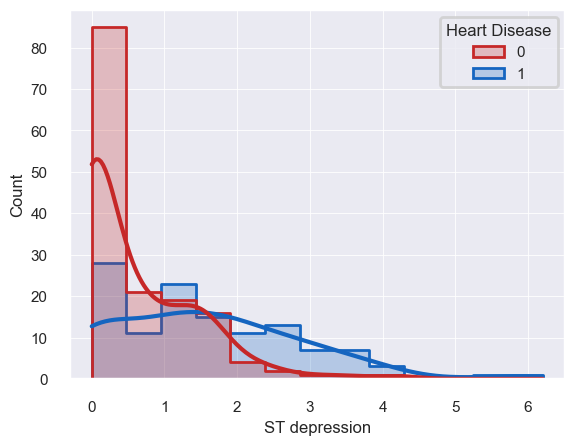

In [ ]:
sns.histplot(data = df, x="ST depression", hue="Heart Disease",kde=True, element='step')

Slope of ST refers to the upward or downward movement of the ST segment on an electrocardiogram. A deviation from the normal slope could indicate the presence of heart disease.

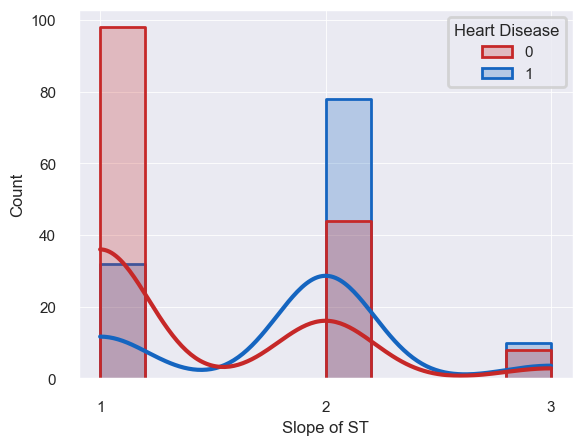

In [ ]:
sns.histplot(data = df, x="Slope of ST", hue="Heart Disease",kde=True, element='step')
plt.xticks([1,2,3])
plt.show()

The number of vessels visible under a fluro imaging test may indicate the presence of heart disease. The more vessels that are blocked or narrowed, the higher the risk of heart disease.

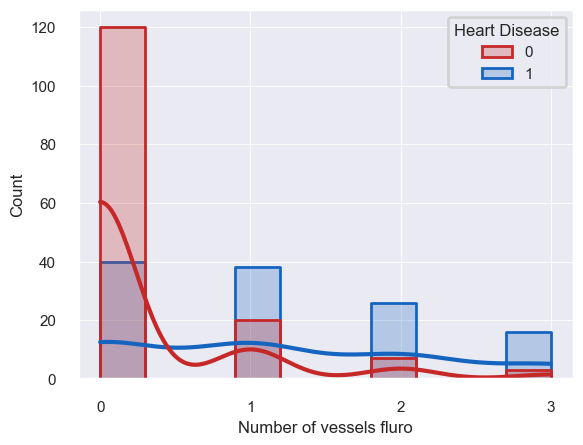

In [ ]:
sns.histplot(data = df, x="Number of vessels fluro", hue="Heart Disease",kde=True, element='step')
plt.xticks(range(4))
plt.show()

Thallium is a radioactive substance used in medical imaging tests to evaluate blood flow to the heart muscle. Thallium stress tests can help diagnose coronary artery disease, a type of heart disease caused by narrowed or blocked arteries

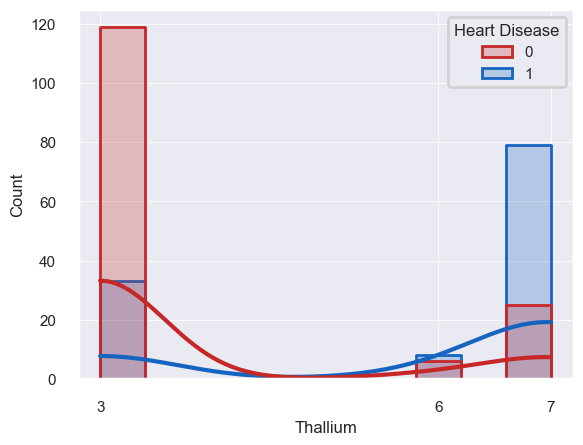

In [ ]:
sns.histplot(data = df, x="Thallium", hue="Heart Disease",kde=True, element='step')
plt.xticks([3,6,7])
plt.show()

Smoking is a significant risk factor for heart disease. It damages blood vessels, increases plaque buildup, and reduces blood flow to the heart, leading to an increased risk of heart disease, heart attack, and stroke.

<AxesSubplot: xlabel='smoking_status', ylabel='Count'>

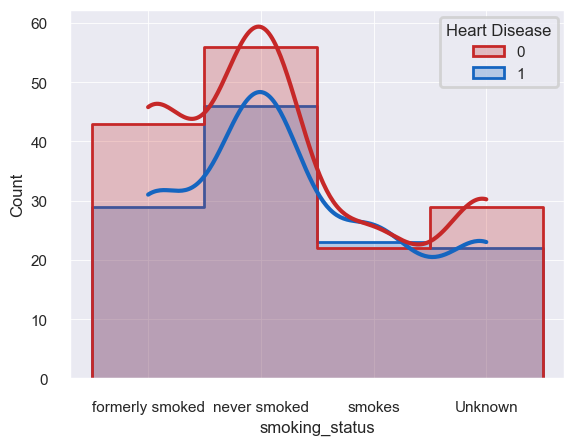

In [ ]:
sns.histplot(data = df, x="smoking_status", hue="Heart Disease",kde=True, element='step')

The relationship between work type and heart disease is complex and can depend on various factors such as physical activity, stress, and environmental exposure. Jobs involving high physical activity may reduce the risk of heart disease, while sedentary jobs and those with high stress or environmental toxins may increase the risk.

<AxesSubplot: xlabel='work_type', ylabel='Count'>

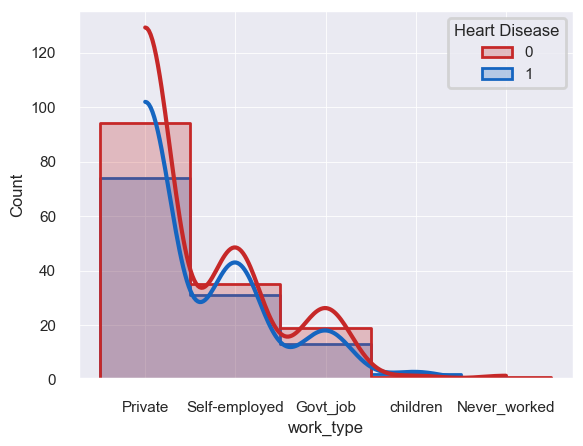

In [ ]:
sns.histplot(data = df, x="work_type", hue="Heart Disease",kde=True, element='step')

### Multivariate Analysis

In [ ]:
df_male=df.loc[df["Gender"]=="Male",:]
df_female=df.loc[df["Gender"]=="Female",:]

Age_disease_male=pd.crosstab(df_male["Age"],df_male["Heart Disease"])*100/85
Age_disease_female=pd.crosstab(df_female["Age"],df_female["Heart Disease"])*100/185

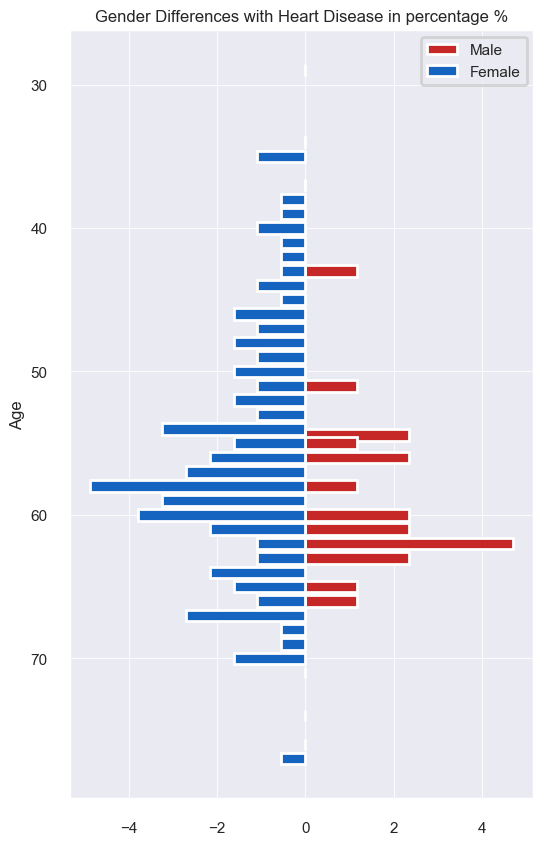

In [ ]:
fig = plt.figure(figsize=(6, 10))

plt.barh(Age_disease_male.index, Age_disease_male.iloc[:,1], color='#C62828',label='Male')
plt.barh(Age_disease_female.index, Age_disease_female.iloc[:,1] * -1, color='#1565C0',label='Female')
plt.title("Gender Differences with Heart Disease in percentage %")
plt.ylabel("Age")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

<AxesSubplot: xlabel='Age'>

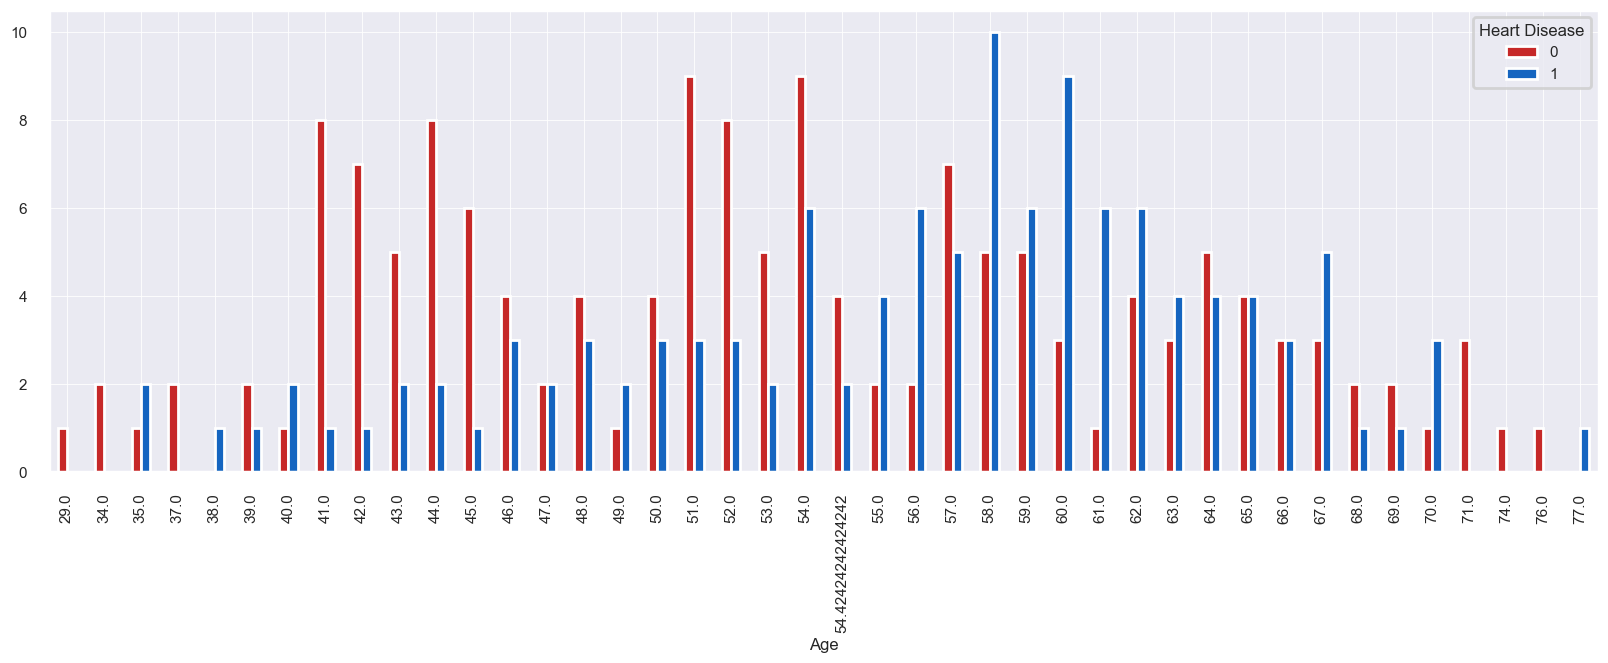

In [ ]:
pd.crosstab(df["Age"],df["Heart Disease"]).plot(kind="bar",figsize=(20,6))

Smoking can increase "bad" cholesterol (LDL) and decrease "good" cholesterol (HDL), which can lead to the buildup of plaque in the arteries and increase the risk of heart disease.

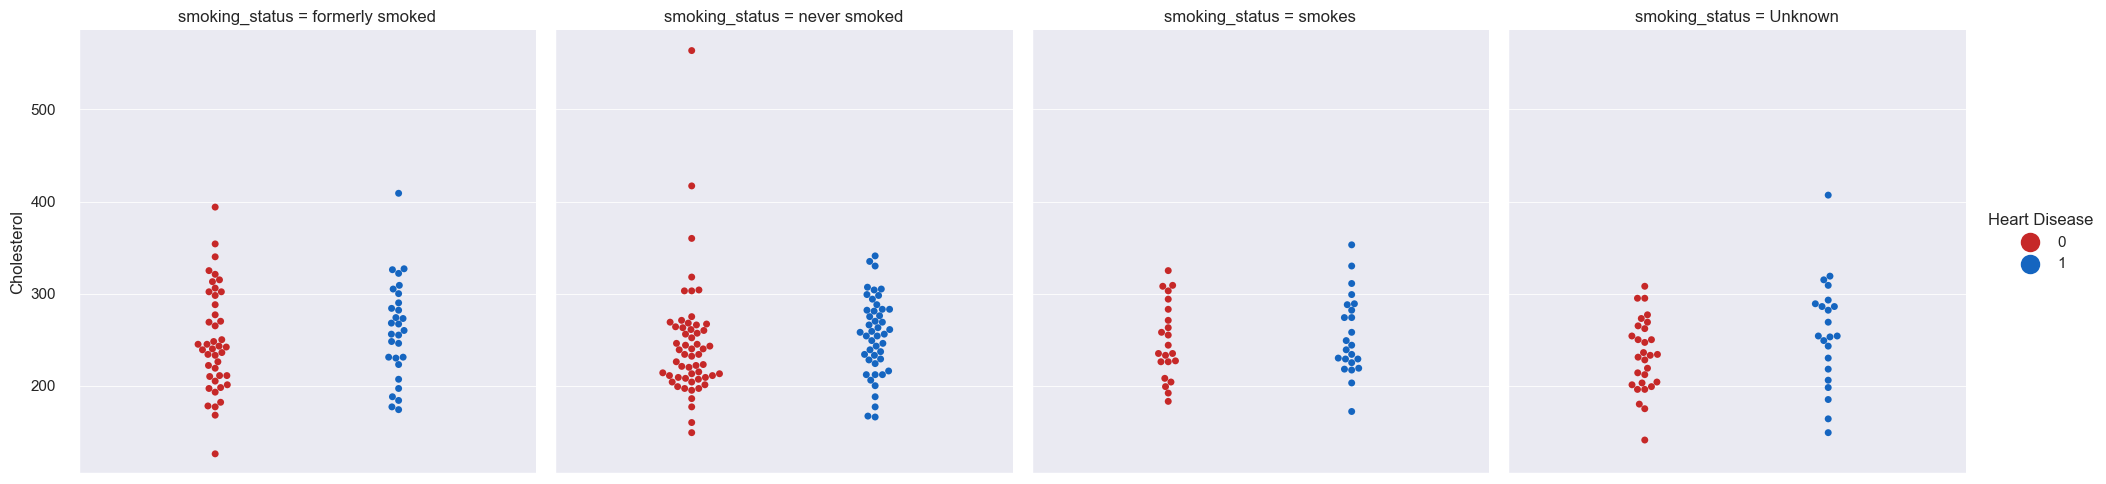

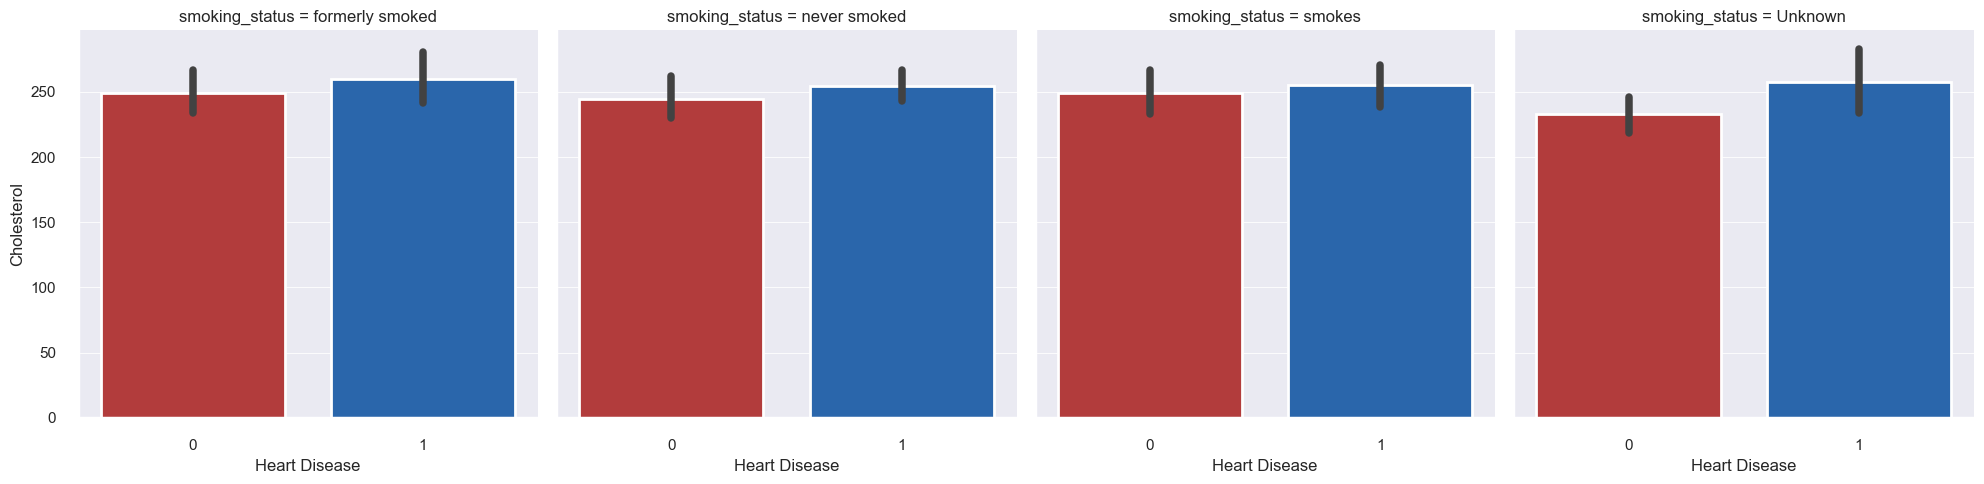

In [ ]:
sns.catplot(data = df, y="Cholesterol",hue="Heart Disease",col="smoking_status",kind="swarm", dodge=True)
sns.catplot(data = df, y="Cholesterol",x="Heart Disease",col="smoking_status",kind="bar")

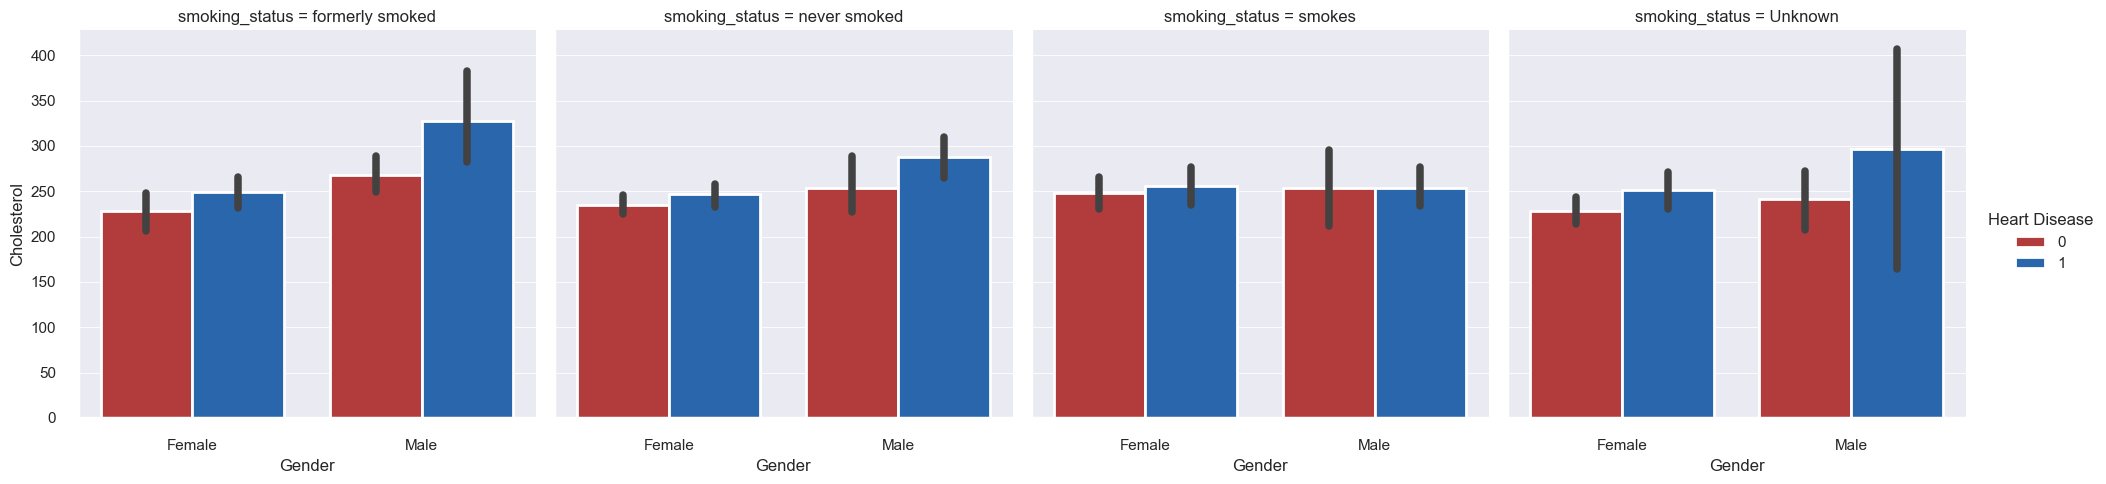

In [ ]:
sns.catplot(data = df, x="Gender",hue="Heart Disease",col="smoking_status",kind="bar", y="Cholesterol")

In [ ]:
continuous_columns

['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Thallium']

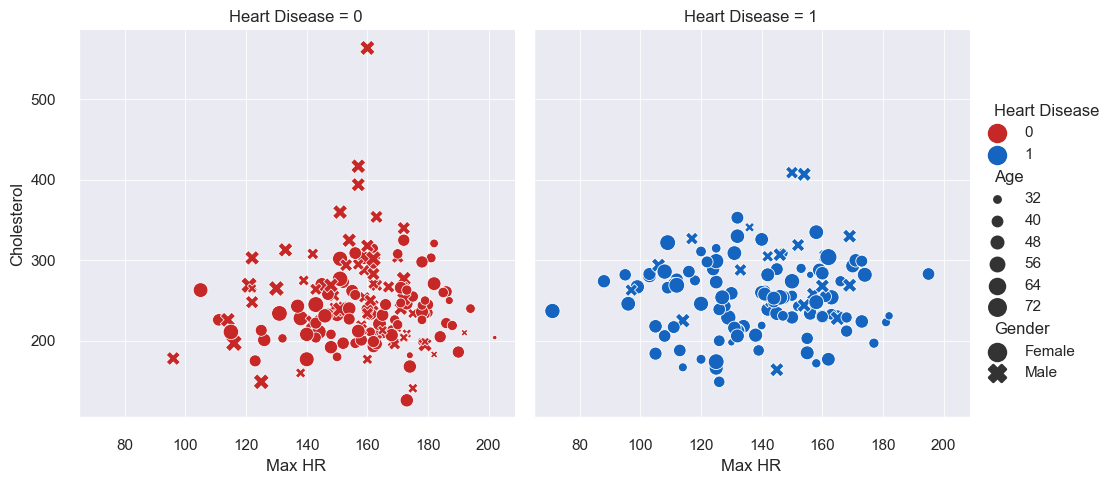

In [ ]:
sns.relplot(data=df, x="Max HR",y='Cholesterol',size='Age',col='Heart Disease',hue='Heart Disease', sizes=(10, 150),style='Gender')

In [ ]:
# #changing data type of Gender, work_type, smoking_status and Heart Disease columns by encoding
# label_encoder = preprocessing.LabelEncoder()
# # Encode labels in column 'species'.
# df['Gender']= label_encoder.fit_transform(df['Gender'])
# df['work_type']= label_encoder.fit_transform(df['work_type'])
# df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])
# df['Heart Disease']= label_encoder.fit_transform(df['Heart Disease'])
# df["Heart Disease"]= np.where(df["Heart Disease"]=="No",0,1)
# df.head()

In [ ]:
#splitting the data to x(features) and y(column we want to predict) 
X=df.drop(['Heart Disease'] ,axis=1)
y=df['Heart Disease']

In [ ]:
#Normlize the data
# Create a StandardScaler object
scaler = StandardScaler()

 #Fit and transform the data
normalized_data = scaler.fit_transform(X)

 #Create a new dataframe from the normalized data
X = pd.DataFrame(normalized_data, columns=X.columns)
X.head(15)

ValueError: could not convert string to float: 'Female'

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 41)
classifier.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=41)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))